# Spatial queries

Finding out if a certain point is located inside of an area, or whether a line intersects with another line (or a polygon) are one of the fundamental geospatial operations that are needed when e.g. selecting data for a specific region. These kind of spatial queries relate to {term}`topological spatial relations` which are fundamental constructs that describe how two or more geometric objects relate to each other concerning their position and boundaries. Topological spatial relations can be exemplified by relationships such as *contains*, *touches* and *intersects* ({cite}`Clementini_1994`). In GIS, the topological relations play a crucial role as they enable queries that are less concerned with the exact coordinates or shapes of geographic entities but more focused on their relative arrangements and positions. For instance, regardless of their exact shape or size, a lake *inside* a forest maintains this relationship even if the forest's boundaries or the lake's size change slightly, as long as the lake remains enclosed by the forest. Next, we will learn a bit more details about these topological relations and how to use them for spatial queries in Python.

## Topological spatial relations

Computationally, conducting queries based on topological spatial relations, such as detecting if a point is inside a polygon can be done in different ways, but most GIS software rely on something called {term}`Dimensionally Extended 9-Intersection Model` ([DE-9IM](https://en.wikipedia.org/wiki/DE-9IM) [^DE-9IM]). DE-9IM is an ISO approved standard and a fundamental framework in GIS that is used to describe and analyze spatial relationships between geometric objects ({cite}`Clementini_1993`). DE-9IM defines the topological relations based on the interior, boundary, and exterior of two geometric shapes and how they intersect with each other (see **Figure 6.XX and Figure 6.XX**). The model also takes into account the dimensionality of the objects: The Point objects are 0-dimensional, LineString and LinearRing are 1-dimensional and Polygons are 2-dimensional. Considering the dimensionality of geometric objects in the DE-9IM model is important because it determines the nature of spatial relations, influences the complexity of interactions between objects, and defines topological rules.

![_**Figure 6.XX**. Interior, boundary and exterior for different geometric data types. The data types can be either 0, 1 or 2-dimensional._](../img/DE-9IM_topology_interior_boundary_exterior.png)

_**Figure 6.XX**. Interior, boundary and exterior for different geometric data types. The data types can be either 0, 1 or 2-dimensional._

By examining the intersections of the interior, boundary and exterior of two geometric objects, a detailed characterization of their spatial relationship can be achieved. One can for instance test whether a given Point or LineString is *within* a Polygon (returning True or False). When testing how two geometries relate to each other, the DE-9IM model gives a result which is called {term}`spatial predicate` (or sometimes {term}`binary predicate`). The **Figure 6.XX** shows eight common spatial predicates based on the spatial relationship between the geometries ({cite}`Egenhofer_1992`). Many of these predicates, such as *intersects*, *within*, *contains*, *overlaps* and *touches* are commonly used when selecting data for specific area of interest or when joining data from one dataset to another based on the spatial relation between the layers. 

![_**Figure 6.XX**. Eight common spatial predicates formed based on spatial relations between two geometries. Modified after Egenhofer et al. (1992)_.](../img/spatial-relations.png)

_**Figure 6.XX**. Eight common spatial predicates formed based on spatial relations between two Polygon geometries. Modified after Egenhofer et al. (1992)_.

The top row of the **Figure 6.XX** shows spatial predicates in which the geometries A and B are clearly disjoint from each other, contained or within each other, or identical to each other. When the geometries have at least one point in common, the geometries are said to be *intersecting* with each other. Thus, in this figure, all the comparisons except the first one (disjoint) are True, i.e. the geometries *intersect* with each other. The bottom row shows examples of spatial relationships that are slightly "special cases" in one way or another. When two geometries *touch* each other, they have at least one point in common (at the border in this case), but their interiors do not intersect with each other. When the interiors of the geometries A and B are partially on top of each other and partially outside of each other, the geometries are *overlapping* with each other. The spatial predicate for *covers* is when the interior of geometry B is almost totally within A, except at least one common coordinate at the border. Similarly, if geometry A is almost totally contained by the geometry B (except at least one common coordinate at the border) the spatial predicate is called *covered by*. These eight examples represent some of the common spatial predicates based on two Polygon shapes. When other shapes are considered (e.g. Points, LineStrings), there are plenty of more topological relations: altogether 512 with 2D data.

## Making spatial queries in Python

Now as we know the basics of topological spatial relations, we can proceed and see how to make such spatial queries using Python. Luckily, we do not need to worry about the exact DE-9IM implementation ourselves, as these functionalities are already implemented to shapely and geopandas libraries. With these libraries, we can evaluate the topolocical relationship between geographical objects easily and efficiently. In Python, all the basic spatial predicates listed in **Figure 6.XX** are available from shapely library, including:
 
 - `.intersects()`
 - `.within()`
 - `.contains()`
 - `.overlaps()`
 - `.touches()`
 - `.covers()`
 - `.covered_by()`
 - `.equals()`
 - `.disjoint()`
 - `.crosses()`

When you want to use Python to find out how two geometric objects are related to each other topologically, you start by creating the geometries using shapely library. In the following, we create a couple of `Point` objects and one `Polygon` object which we can use to test how they relate to each other: 

In [133]:
from shapely import Point, Polygon

# Create Point objects
point1 = Point(24.952242, 60.1696017)
point2 = Point(24.976567, 60.1612500)

# Create a Polygon
coordinates = [
    (24.950899, 60.169158),
    (24.953492, 60.169158),
    (24.953510, 60.170104),
    (24.950958, 60.169990)
]
polygon = Polygon(coordinates)

# Print the objects
print(point1)
print(point2)
print(polygon)

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


If you want to test whether these `Point` geometries stored in `point1` and `point2` are within the `polygon`, you can call the `.within()` method as follows:

In [2]:
point1.within(polygon)

True

In [3]:
point2.within(polygon)

False

As we can see, the first point seem to be located within the polygon where as the second one does not. 

One of the most common spatial queries is to see if a geometry intersects or touches another one. Again, there are binary operations in shapely for checking these spatial relationships:

- `.intersects()` - Two objects intersect if the boundary or interior of one object intersect in any way with the boundary or interior of the other object.
- `.touches()` - Two objects touch if the objects have at least one point in common and their interiors do not intersect with any part of the other object.
   
Let's try these by creating two `LineString` geometries and test whether they intersect and touch each other:

In [134]:
from shapely import LineString, MultiLineString

# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

In [135]:
line_a.intersects(line_b)

True

In [136]:
line_a.touches(line_b)

True

As we can see, it seems that our two `LineString` objects are both intersecting and touching each other. We can confirm this by plotting the features together as a `MultiLineString`:

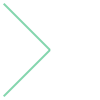

In [113]:
# Create a MultiLineString from line_a and line_b
multi_line = MultiLineString([line_a, line_b])
multi_line

_**Figure 6.XX**. Two LineStrings that both intersect and touch each other._

As we can see, the lines `.touch()` each other because `line_b` continues from the same node ( (1,1) ) where the `line_a` ends.
However, if the lines are fully overlapping with each other they don't touch due to the spatial relationship rule in the DE-9IM. We can confirm this by checking if `line_a` touches itself:

In [114]:
line_a.touches(line_a)

False

It does not. However, the `.intersects()` and `.equals()` should produce `True` for a case when we compare the `line_a` with itself:

In [118]:
print("Intersects?", line_a.intersects(line_a))
print("Equals?", line_a.equals(line_a))

Intersects? True
Equals? True


In a similar manner as in the examples above, you can test all different spatial predicates and assess the spatial relationship between geometries. The following prints results for all predicates between the `point1` and the `polygon` which we created earlier: 

In [13]:
print("Intersects?", point1.intersects(polygon))
print("Within?", point1.within(polygon))
print("Contains?", point1.contains(polygon))
print("Overlaps?", point1.overlaps(polygon))
print("Touches?", point1.touches(polygon))
print("Covers?", point1.covers(polygon))
print("Covered by?", point1.covered_by(polygon))
print("Equals?", point1.equals(polygon))
print("Disjoint?", point1.disjoint(polygon))
print("Crosses?", point1.crosses(polygon))

Intersects? True
Within? True
Contains? False
Overlaps? False
Touches? False
Covers? False
Covered by? True
Equals? False
Disjoint? False
Crosses? False


By going through all the spatial predicates, we can see that the spatial relationship between our point and polygon object produces three `True` values: The point and polygon intersect with each other, the point is within the polygon, and the point is covered by the polygon. All the other tests correctly produce `False`, which matches with the logic of the `DE-9IM` standard. 

It is good to notice that some of these spatial predicates are closely related to each other. For example, the `.within()` and `covered_by()` in our tests produce similar result with our data. Also `.contains()` is closely related to `within()`. Our `point1` was within the `polygon`, but we can also say that the `polygon` contains `point1`. Hence, both tests produce the same result, but the logic for the relationship is inverse. Which one should you use then? Well, it depends:

-  if you have many points and just one polygon and you try to find out which one of them is inside the polygon: You might need to iterate over the points and check one at a time if it is `.within()` the polygon.
-  if you have many polygons and just one point and you want to find out which polygon contains the point: You might need to iterate over the polygons until you find a polygon that `.contains()` the point specified (assuming there are no overlapping polygons).

## Spatial queries using geopandas

Now as we have learned how to investigate the spatial relationships between shapely geometries, we can continue and learn how to conduct similar spatial queries with geopandas `GeoDataFrames`. Conducting spatial queries with geopandas is handy because you can easily compare the spatial relationships between multiple geometries stored in separate `GeoDataFrames`. Next, we will run an example in which we check which points are located within specific areas of Helsinki. Let's start by reading data that contains Polygons for major districts in Helsinki Region, as well as a few point observations that represent addresses around Helsinki that we geocoded in the previous section:

In [119]:
import geopandas as gpd

points = gpd.read_file("data/Helsinki/addresses.shp")
districts = gpd.read_file("data/Helsinki/Major_districts.gpkg")

In [120]:
print("Shape:", points.shape)
points.head()

Shape: (34, 4)


,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93166 60.16905)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94168 60.16996)
3,"Hermannin rantatie, Verkkosaari, Kalasatama, S...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.97865 60.19005)
4,"9, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92151 60.15662)


In [121]:
print("Shape:", districts.shape)
districts.tail(5)

Shape: (23, 3)


,Name,Description,geometry
18,Koivukylä,,"POLYGON Z ((24.99423 60.33296 0.00000, 25.0000..."
19,Itäinen,,"POLYGON Z ((25.03517 60.23627 0.00000, 25.0358..."
20,Östersundom,,"POLYGON Z ((25.23352 60.25655 0.00000, 25.2374..."
21,Hakunila,,"POLYGON Z ((25.08472 60.27248 0.00000, 25.0849..."
22,Korso,,"POLYGON Z ((25.12380 60.34191 0.00000, 25.1199..."


We can see that we have altogether 34 points and 23 districts in our area. For demonstration purposes, we are interested in finding all points that are within two areas in Helsinki region, namely `Itäinen` and `Eteläinen` (*'Eastern'* and *'Southern'* in English). Let's first select the districts using the `.loc` indexer and the listed criteria which we can use with the `.isin()` method to filter the data, as we learned already in Chapter 3:

In [127]:
selection = districts.loc[districts["Name"].isin(["Itäinen", "Eteläinen"])]
selection.head()

,Name,Description,geometry
10,Eteläinen,,"POLYGON Z ((24.78277 60.09997 0.00000, 24.8197..."
19,Itäinen,,"POLYGON Z ((25.03517 60.23627 0.00000, 25.0358..."


Let's now plot the layers on top of each other. The areas with red color represent the districts that we want to use for testing the spatial relationships against the point layer (shown with blue color):

<Axes: >

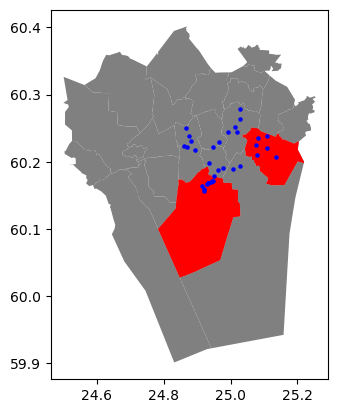

In [129]:
base = districts.plot(facecolor="gray")
selection.plot(ax=base, facecolor="red")
points.plot(ax=base, color="blue", markersize=5)

_**Figure 6.XX**. ADD PROPER FIGURE CAPTION!._

As we can see from **Figure 6.XX**, many points seem to be within the two selected districts. To find out which of of them are located within the Polygon. Hence, we are conducting a **Point in Polygon query**.

- Let's check which Points are within the ``southern`` Polygon. Notice, that here we check if the Points are ``within`` the **geometry**
  of the ``southern`` GeoDataFrame. 
- We use the ``.at[0, 'geometry']`` to parse the actual Polygon geometry object from the GeoDataFrame.

In [98]:
pip_mask = points.within(selection.unary_union)
print(pip_mask)

0      True
1      True
2      True
3     False
4      True
5      True
6      True
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22     True
23     True
24     True
25     True
26    False
27    False
28    False
29    False
30     True
31     True
32     True
33     True
dtype: bool


As we can see, we now have an array of boolean values for each row, where the result is ``True``
if Point was inside the Polygon, and ``False`` if it was not.

We can now use this mask array to select the Points that are inside the Polygon. Selecting data with this kind of mask array (of boolean values) is easy by passing the array inside the ``loc`` indexer:


In [72]:
pip_data = points.loc[pip_mask]
pip_data

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93166 60.16905)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94168 60.16996)
4,"9, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92151 60.15662)
5,"18, Kontulantie, Kontula, Mellunkylä, Itäinen ...",1006,"Kontulantie 18, 00940 Helsinki, Finland",POINT (25.08174 60.23522)
6,"Itäväylä, Vartioharju, Vartiokylä, Itäinen suu...",1007,"Itäväylä 3, 00950 Helsinki, Finland",POINT (25.10974 60.22102)
10,"Rautatientori, Kaisaniemi, Kluuvi, Eteläinen s...",1011,"Rautatientori 1, 00100 Helsinki, Finland",POINT (24.94410 60.17133)
22,"Danske Bank, 1, Tallinnanaukio, Itäkeskus, Var...",1023,"Tallinnanaukio 1, 00930 Helsinki, Finland",POINT (25.07835 60.20982)
23,"Tyynylaavantie, Keski-Vuosaari, Vuosaari, Itäi...",1024,"Tyynylaavantie 7, 00980 Helsinki, Finland",POINT (25.13517 60.20727)
24,"Myllypurontie, Myllypuro, Vartiokylä, Itäinen ...",1025,"Myllypurontie 5, 00920 Helsinki, Finland",POINT (25.07523 60.22487)


Let's finally confirm that our Point in Polygon query worked as it should by plotting the points that are within the southern district:

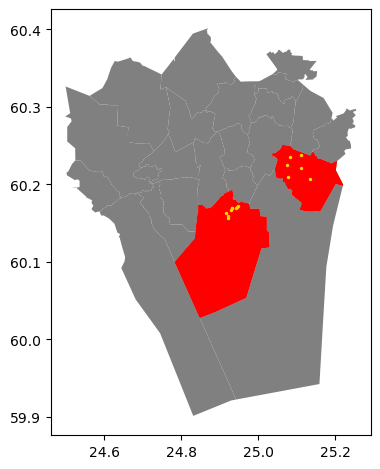

In [73]:
# Create a figure with one subplot
fig, ax = plt.subplots()

# Plot polygons
districts.plot(ax=ax, facecolor="gray")
selection.plot(ax=ax, facecolor="red")

# Plot points
pip_data.plot(ax=ax, color="gold", markersize=2)

plt.tight_layout()

_**Figure 6.30**. ADD PROPER FIGURE CAPTION!._

Perfect! Now we only have the (golden) points that, indeed, are inside the red Polygon which is exactly what we wanted!

## Footnotes

[^DE-9IM]: <https://en.wikipedia.org/wiki/DE-9IM>